In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import os
import json
import base64
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

In [2]:
from constants import guest_types
from constants import colors
from bootstrap import bootstrap
from bootstrap import dG_bootstrap
from bootstrap import dH_bootstrap

from summarize_statistics import write_statistics
import plotting

In [3]:
from constants import experimental_deltaG
from constants import experimental_deltaH
from constants import systems

In [ ]:
def json_numpy_obj_hook(dct):
    """Decodes a previously encoded numpy ndarray with proper shape and dtype.
    :param dct: (dict) json encoded ndarray
    :return: (ndarray) if input was an encoded ndarray
    """
    if isinstance(dct, dict) and "__ndarray__" in dct:
        data = base64.b64decode(dct["__ndarray__"])
        return np.frombuffer(data, dct["dtype"]).reshape(dct["shape"])
        # return dct['__ndarray__']
    return dct

In [ ]:
def combine_data(df):
    """
    Combine data for individual orientations into a single thermodynamic value.
    """

    combined = pd.DataFrame()
    df["Short"] = [i[0:-2] for i in df["System"].values]

    for hg in df["Short"].unique():
        tmp = df[df["Short"] == hg]
        for _, row in tmp.iterrows():
            if "p" in row["System"].split("-")[2]:
                # Reducing generality for speed.
                primary_fe = row[f"Delta G"]
                primary_fe_sem = row[f"G_SEM"]

                primary_enthalpy = row[f"Delta H"]
                primary_enthalpy_sem = row[f"H_SEM"]
            else:
                secondary_fe = row[f"Delta G"]
                secondary_fe_sem = row[f"G_SEM"]

                secondary_enthalpy = row[f"Delta H"]
                secondary_enthalpy_sem = row[f"H_SEM"]
        combined_fe = dG_bootstrap(
                    primary_fe,
                    primary_fe_sem,
                    secondary_fe,
                    secondary_fe_sem,
                    cycles=100000,
        )
        combined_enthalpy = dH_bootstrap(
            primary_enthalpy,
            primary_enthalpy_sem,
            secondary_enthalpy,
            secondary_enthalpy_sem,
            primary_fe,
            primary_fe_sem,
            secondary_fe,
            secondary_fe_sem,
            cycles=100000,
        )

        combined = combined.append(
            {
                "System": hg,
                "Delta G": combined_fe["mean"],
                "G_SEM": combined_fe["sem"],
                "G_CI": combined_fe["ci"],
                "Delta H": combined_enthalpy["mean"],
                "H_SEM": combined_enthalpy["sem"],
                "H_CI": combined_enthalpy["ci"],
                "Type": guest_types[hg],
            },
            ignore_index=True,
        )
    return combined

## 1. Combine the data by bootstrapping

In [ ]:
# for fraction in [0.2, 0.4, 0.6, 0.8]:
    
#     print(f"Working on fraction {fraction}...")

#     smirnoff = pd.DataFrame()

#     for system in systems:
        
#         print(f"Working on system {system}...")

#         with open(f"/home/davids4/gpfs/smirnoff-host-guest-simulations-data/results/fractions/{system}-fractions-results.json", "r") as f:
#             json_data = f.read()
#         results = json.loads(json_data, object_hook=json_numpy_obj_hook)

#         with open(f"/home/davids4/gpfs/smirnoff-host-guest-simulations-data/results/pre-enthalpy/{system[0]}-release.json", "r") as f:
#             json_data = f.read()
#         results_release = json.loads(json_data, object_hook=json_numpy_obj_hook)


#         smirnoff_attach = results["attach"]["ti-block"]["fraction_fe"][f"{fraction}"]
#         smirnoff_pull = results["pull"]["ti-block"]["fraction_fe"][f"{fraction}"]
#         smirnoff_release = results_release["release"]["ti-block"]["fe"]

#         smirnoff_attach_sem = results["attach"]["ti-block"]["fraction_sem"][f"{fraction}"]
#         smirnoff_pull_sem = results["pull"]["ti-block"]["fraction_sem"][f"{fraction}"]
#         smirnoff_release_sem = results_release["release"]["ti-block"]["sem"]

#         smirnoff_analytic = 7.14

#         delta_g = -1 * (
#             smirnoff_attach + smirnoff_pull - smirnoff_release - smirnoff_analytic
#         )
#         delta_g_sem = np.sqrt(
#             smirnoff_attach_sem ** 2 + smirnoff_pull_sem ** 2 + smirnoff_release_sem ** 2
#         )

#         with open(f"results/{system}-smirnoff-enthalpy-full.json", "r") as f:
#             json_data = f.read()
#         loaded = json.loads(json_data)
#         delta_h = loaded["a000"]["total"][0] - loaded["r014"]["total"][0]
#         delta_h_sem = np.sqrt(
#             loaded["a000"]["total"][1] ** 2 + loaded["r014"]["total"][1] ** 2
#         )

#         smirnoff = smirnoff.append(
#             {
#                 "System": system,
#                 "Delta G": delta_g,
#                 "G_SEM": delta_g_sem,
#                 "Delta H": delta_h,
#                 "H_SEM": delta_h_sem,
#                 "Type": guest_types[system[0:-2]],
#             },
#             ignore_index=True,
#         )

#     smirnoff.to_csv(f"/home/davids4/gpfs/smirnoff-host-guest-simulations-data/results/fractions/smirnoff_by_orientation_fraction_{fraction}.csv")
#     smirnoff_combined = combine_data(smirnoff)
#     smirnoff_combined.to_csv(f"/home/davids4/gpfs/smirnoff-host-guest-simulations-data/results/fractions/smirnoff_by_orientation_fraction_{fraction}_combined.csv")



Working on fraction 0.2...
Working on system a-bam-p...
Working on system a-bam-s...
Working on system a-but-p...
Working on system a-but-s...
Working on system a-cbu-p...
Working on system a-chp-p...
Working on system a-cbu-s...
Working on system a-chp-s...
Working on system a-cpe-p...
Working on system a-coc-p...
Working on system a-coc-s...
Working on system a-cpe-s...
Working on system a-hep-p...
Working on system a-ham-s...
Working on system a-ham-p...
Working on system a-hep-s...
Working on system a-hp6-p...
Working on system a-hex-p...
Working on system a-hex-s...
Working on system a-hp6-s...
Working on system a-hx2-p...
Working on system a-hpa-s...
Working on system a-hpa-p...
Working on system a-hx2-s...
Working on system a-mba-p...
Working on system a-hx3-s...
Working on system a-hx3-p...
Working on system a-mba-s...
Working on system a-mhp-p...
Working on system a-mha-p...
Working on system a-mha-s...
Working on system a-mhp-s...
Working on system a-nmh-p...
Working on syste

 24%|██▍       | 24029/100000 [02:25<07:23, 171.38it/s]

## 2. Compute the statistics

In [ ]:
for fraction in [0.2, 0.4, 0.6, 0.8]:
    
    smirnoff_combined = pd.read_csv(f"/home/davids4/gpfs/smirnoff-host-guest-simulations-data/results/fractions/smirnoff_by_orientation_fraction_{fraction}_combined.csv")
    experimental = pd.read_csv("results/experimental.csv")
    write_statistics(experimental, smirnoff_combined, "G", f"experimental_smirnoff_fraction_{fraction}", overwrite=False)

Bootstrapping results/experimental_smirnoff_fraction_0.2_dG_statistics_overall.csv
Bootstrapping results/experimental_smirnoff_fraction_0.2_dG_statistics_aliphatic_ammoniums.csv
Bootstrapping results/experimental_smirnoff_fraction_0.2_dG_statistics_cyclic_alcohols.csv
Bootstrapping results/experimental_smirnoff_fraction_0.2_dG_statistics_aliphatic_carboxylates.csv
Bootstrapping results/experimental_smirnoff_fraction_0.4_dG_statistics_overall.csv
Bootstrapping results/experimental_smirnoff_fraction_0.4_dG_statistics_aliphatic_ammoniums.csv
Bootstrapping results/experimental_smirnoff_fraction_0.4_dG_statistics_cyclic_alcohols.csv
Bootstrapping results/experimental_smirnoff_fraction_0.4_dG_statistics_aliphatic_carboxylates.csv
Bootstrapping results/experimental_smirnoff_fraction_0.6_dG_statistics_overall.csv
Bootstrapping results/experimental_smirnoff_fraction_0.6_dG_statistics_aliphatic_ammoniums.csv
Bootstrapping results/experimental_smirnoff_fraction_0.6_dG_statistics_cyclic_alcohols.c

In [4]:
def return_bootstrapped_dictionary(
    df_one, df_two, thermodynamic_quantity, cycles=100000,
    name="smirnoff_experimental"
):
    try:
        df = df_one.merge(df_two, on=["System", "Type"], suffixes=("_i", "_j"))
    except KeyError:
        # Experimental doesn't have a Type column, so won't merge cleanly.
        df = df_one.merge(df_two, on=["System"], suffixes=("_i", "_j"))
    
    
    results = bootstrap(
        x=df[f"Delta {thermodynamic_quantity}_i"],
        x_sem=df[f"{thermodynamic_quantity}_SEM_i"],
        y=df[f"Delta {thermodynamic_quantity}_j"],
        y_sem=df[f"{thermodynamic_quantity}_SEM_j"],
        cycles=cycles,
    )
    key = dict()
    key[name] = results
    return key

# Important to merge local `results` and `GPFS` results

## 3. Plot

Text(0.5, 0, 'Fraction of simulation data')

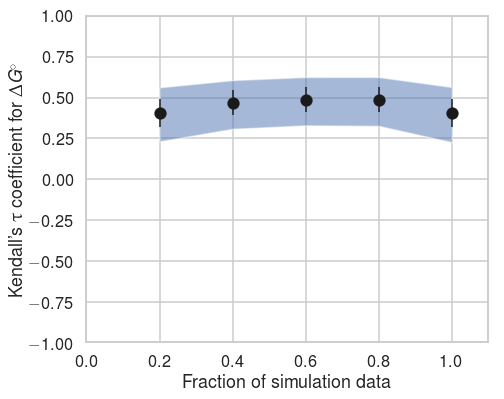

In [7]:
fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

fractions = [0.2, 0.4, 0.6, 0.8, 1.0]
ci_low, ci_high = [], []
for fraction in fractions:

    if fraction != 1.0:
        statistics = pd.read_csv(f"results/experimental_smirnoff_fraction_{fraction}_dG_statistics_overall.csv")
    else:
        statistics = pd.read_csv(f"results/experimental_smirnoff_dG_statistics_overall.csv")
    
    statistics.index = statistics["Unnamed: 0"]
    ax.errorbar(
            fraction,
            statistics["mean"]["Tau"],
            yerr = statistics["sem"]["Tau"],
            fmt="o",
            markersize=12,
            markeredgecolor="k",
            markeredgewidth=0.2,
            elinewidth=1.5,
            ecolor="k",
            color="k"
    )
    
    ci_low.append(statistics["ci_low"]["Tau"])
    ci_high.append(statistics["ci_high"]["Tau"])

ax.fill_between(fractions, 
                ci_low, 
                ci_high,
                alpha=0.5)

ax.set_ylim(-1.0, 1.0)
ax.set_xlim(0, 1.1)
ax.set_ylabel(r"Kendall's $\tau$ coefficient for $\Delta G^\circ$")
ax.set_xlabel("Fraction of simulation data")

In [26]:
statistics["ci_high"]["Tau"]

0.5636766334440753